In [ ]:
import module1
from importlib import reload
reload(module1)

def run_experiment(img_size, channel_count):
    ca = module1.CellularAutomata(
        img_size=img_size, 
        channel_count=channel_count, 
        layer_counts=[512],
        perception_kernel=module1.sobel_state_kernel())
    lifetime = img_size * 2
    ca.edge_strategy = module1.EdgeStrategy.MIRROR

    x0 = ca.pointfilled
    xf = lambda: ca.bordered(ca.constfilled(1.0), border_value=0.0)
    training = module1.init_training(ca, do_load=False, learning_rate=1.0e-3)
    training.show_sample_run(x0, xf, lifetime)

    print("Training...")
    training.run(x0, xf, lifetime, target_loss=0, max_seconds=20)
    training.show_sample_run(x0, xf, lifetime)
    training.show_loss_history()
    return training

results = {}
irange = range(4,12)
jrange = range(4,12)

for i in irange:
    for j in jrange:
        for n in range(20):
            print(f"Running experiment ({i},{j})...")
            res = run_experiment(img_size=i, channel_count=j)
            if (i,j) not in results: results[(i,j)] = []
            results[(i,j)].append(res)

RESULTS: 


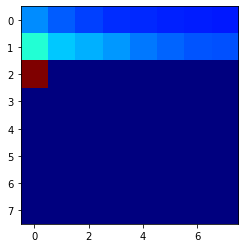

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("RESULTS: ")

vals = np.zeros([len(irange), len(jrange)])
for k,v in results.items():
    i,j = k
    vals[i-irange[0],j-jrange[0]] = sum([len(vi.loss_hist) for vi in v]) / len(v)

fig, ax = plt.subplots()
im = ax.imshow(vals, cmap='jet')

plt.show()